In [247]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [248]:
#reading data
data=pd.read_csv('crop_production.csv')

In [249]:
#displaying first five rows of data
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [250]:
#displaying last five rows of data
data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [251]:
#displaying shape of data
data.shape

(246091, 7)

In [252]:
#printing data types of columns
data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [253]:
#printing rows and columns in data
print('There are {0} rows and {1} columns in data.'.format(data.shape[0],data.shape[1]))

There are 246091 rows and 7 columns in data.


In [254]:
#displaying information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [255]:
#displaying statistical information of data
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [256]:
#calculating number of null values present in different columns of data
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

<AxesSubplot:>

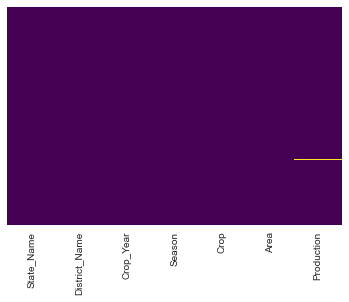

In [257]:
#VISUALING NULL VALUES OF THE COLUMNS USING HEATMAP
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [258]:
#dropping rows consisting of null values
data.dropna(axis=0,inplace=True)

In [259]:
#calculating number of null values present in different columns of data
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

<AxesSubplot:>

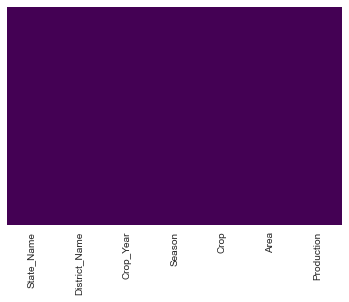

In [260]:
#VISUALING NULL VALUES OF THE COLUMNS USING HEATMAP
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [261]:
#displaying dimensions of data after dropping null value rows
data.shape

(242361, 7)

In [262]:
#renaming of column names
data.rename(columns={'State_Name':'State','District_Name':'District','Crop_Year':'Year'},inplace=True)

In [263]:
#displaying first five rows of data
data.head()

,State,District,Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [264]:
#calculating first quartile,second quartile and iqr
q1=data['Area'].quantile(0.25)
q3=data['Area'].quantile(0.75)
IQR=q3-q1

In [265]:
#calculating lower bound and upper bound 
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

In [266]:
#printing first quartile
q1

87.0

In [267]:
#printing third quartile
q3

4545.0

In [268]:
#printing inter-quartile range
IQR

4458.0

In [269]:
#printing lower bound 
lower_limit

-6600.0

In [270]:
#printing upper bound
upper_limit

11232.0

In [271]:
#removing outliers from the data
data=data[(data['Area']>lower_limit)&(data['Area']<upper_limit)]

In [272]:
#printing dimensions of data after removing outliers
data.shape

(202430, 7)

In [273]:
#displaying different states
data['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [274]:
#printing total number of states
data['State'].nunique()

33

In [275]:
#displaying different district present in data
data['District'].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [276]:
#displaying total number of districts 
data['District'].nunique()

646

In [277]:
#printing different season 
data['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [278]:
#removing white spaces from season 
data['State']=data['State'].apply(lambda x:x.strip())
data['Season']=data['Season'].apply(lambda x:x.strip())
data['District']=data['District'].apply(lambda x:x.strip().lower().capitalize())

In [279]:
#displaying first five rows of data
data.head()

,State,District,Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0


In [280]:
#displaying data where production is zero
data[data['Production']==0]

,State,District,Year,Season,Crop,Area,Production
397,Andhra Pradesh,Anantapur,2002,Kharif,Soyabean,51.0,0.0
424,Andhra Pradesh,Anantapur,2002,Whole Year,Cucumber,18.0,0.0
428,Andhra Pradesh,Anantapur,2002,Whole Year,other fibres,132.0,0.0
430,Andhra Pradesh,Anantapur,2002,Whole Year,Other Vegetables,1767.0,0.0
481,Andhra Pradesh,Anantapur,2003,Whole Year,Cucumber,51.0,0.0
...,...,...,...,...,...,...,...
221362,Uttar Pradesh,Mainpuri,2003,Rabi,Linseed,1.0,0.0
222672,Uttar Pradesh,Meerut,2002,Kharif,Moong(Green Gram),1.0,0.0
224493,Uttar Pradesh,Pilibhit,2002,Kharif,Moong(Green Gram),1.0,0.0
227377,Uttar Pradesh,Sant ravidas nagar,2003,Rabi,Linseed,1.0,0.0


In [281]:
#total number of rows have zero production
len(data[data['Production']==0])

3515

In [282]:
#getting index number of rows where production is zero
ind=data[data['Production']==0].index

In [283]:
#dropping rows from data where production is zero
data.drop(index=ind,axis=0,inplace=True)

In [284]:
#displaying dimensions of data after dropping rows
data.shape

(198915, 7)

In [285]:
#displaying different years value
data['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [286]:
#taking data from 2000 onwards
data=data[data['Year']>=2000]

In [287]:
#displaying dimensions of data after filtering out data
data.shape

(173159, 7)

In [288]:
#differnt season value count
data['Season'].value_counts()

Kharif        64729
Rabi          47461
Whole Year    42776
Summer        11640
Winter         3289
Autumn         3264
Name: Season, dtype: int64

In [289]:
#summer and autumn are synonyms of kharif and witner is synonym of rabi
data['Season']=data['Season'].apply(lambda x:x.replace('Autumn','Kharif'))
data['Season']=data['Season'].apply(lambda x:x.replace('Winter','Rabi'))
data['Season']=data['Season'].apply(lambda x:x.replace('Summer','Kharif'))

In [290]:
#printing value counts of season
data['Season'].value_counts()

Kharif        79633
Rabi          50750
Whole Year    42776
Name: Season, dtype: int64

In [291]:
#calculating production per area
data['Prod_Per_Area']=data['Production']/data['Area']

In [292]:
data

,State,District,Year,Season,Crop,Area,Production,Prod_Per_Area
0,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246085,West Bengal,Purulia,2014,Kharif,Maize,325.0,2039.0,6.273846
246086,West Bengal,Purulia,2014,Kharif,Rice,306.0,801.0,2.617647
246087,West Bengal,Purulia,2014,Kharif,Sesamum,627.0,463.0,0.738437
246088,West Bengal,Purulia,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321


In [293]:
#replacing sub category of cotton and jute to main category
data['Crop']=data['Crop'].apply(lambda x:x.replace('Kapas','Cotton(lint)').replace('Cotton(lint)','Cotton'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Jute & mesta','Jute'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Mesta','Jute'))

In [294]:
#replacing variety of spices to spices
data['Crop']=data['Crop'].apply(lambda x:x.replace('Black pepper','Spices'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Cardamom','Spices'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Perilla','Spices'))

In [295]:
#replacing variety of pulses to category pulses
data['Crop']=data['Crop'].apply(lambda x:x.replace('Other Kharif pulses','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Other  Rabi pulses','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Peas & beans (Pulses)','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Pulses total','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('other misc. pulses','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Moong(Green Gram)','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Urad','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Arhar/Tur','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Bean','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Ricebean (nagadal)','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Lentil','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Masoor','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Khesari','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Horse-gram','Pulses'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Rajmash Kholar','Pulses'))

In [296]:
#renaming the wrong values of crop arecanut
data['Crop']=data['Crop'].apply(lambda x:x.replace('Atcanut (Raw)','Arecanut'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Arcanut (Processed)','Arecanut'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Arecanut','Arecanut'))

In [297]:
#replacing the variety of fruits to category fruits
data['Crop']=data['Crop'].apply(lambda x:x.replace('Papaya','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Mango','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Orange','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Other Fresh Fruits','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Pineapple','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Citrus Fruit','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Pome Fruit','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Pome Granet','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Grapes','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Jack Fruit','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Sapota','Fruits'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Lemon','Fruits'))

In [298]:
#renaming crops to most widely used name of crop
data['Crop']=data['Crop'].apply(lambda x:x.replace('Turnip','Onion'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Cashewnut Raw','Cashewnut'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Cashewnut Processed','Cashewnut'))

In [299]:
#replacing different variety of grams to main category gram
data['Crop']=data['Crop'].apply(lambda x:x.replace('black gram','Gram'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Moth','Gram'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Blackgram','Gram'))

In [300]:
#replacing different oilseeds crop to main category oilseeds
data['Crop']=data['Crop'].apply(lambda x:x.replace('Oilseeds total' ,'Oilseeds'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Niger seed' ,'other oilseeds'))

In [301]:
#replacing different variety of millets to main category bajra
data['Crop']=data['Crop'].apply(lambda x:x.replace('Other Cereals & Millets' ,'Bajra'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Samai' ,'Bajra'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Small millets' ,'Bajra'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Ragi','Bajra'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Varagu','Bajra'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Jobster','Bajra'))

In [302]:
#replacing different vegetables to main category vegetables
data['Crop']=data['Crop'].apply(lambda x:x.replace('Coriander' ,'Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('pulsess & Mutter(Vegetable)' ,'Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Bhindi' ,'Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Tomato','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Cowpea(Lobia)','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Cabbage','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Carrot','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Drum Stick','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Redish','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Cauliflower','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Colocosia','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Brinjal','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Bottle Gourd','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Bitter Gourd','Vegetables'))

In [303]:
#erplacing sub-category with there main-category
data['Crop']=data['Crop'].apply(lambda x:x.replace('Niger seed','Sesamum'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Korra','Total Foodgrain'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Paddy','Rice'))

In [304]:
#replacing sub-category to main category
data['Crop']=data['Crop'].apply(lambda x:x.replace('Other Vegetables','Vegetables'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Dry Ginger','Ginger'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('other oilseeds','Oilseeds'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Rapeseed &Mustard','Rapseed & Mustard'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Other Spices','Spices'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Dry ginger','Ginger'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Sannhamp','Sunnhemp'))
data['Crop']=data['Crop'].apply(lambda x:x.replace('Total foodgrain','Foodgrain'))

In [305]:
#printing unique crops after updation
data['Crop'].unique()

array(['Arecanut', 'Pulses', 'Rice', 'Banana', 'Cashewnut', 'Ginger',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Spices', 'Dry chillies',
       'Oilseeds', 'Turmeric', 'Maize', 'Coconut ', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Gram', 'Jowar',
       'Total Foodgrain', 'Onion', 'Sesamum', 'Linseed', 'Safflower',
       'Wheat', 'Vegetables', 'Potato', 'Tobacco', 'Cotton',
       'Pulsess & Mutter(Vegetable)', 'Fruits', 'Soyabean', 'Jute',
       'Rapseed & Mustard', 'Garlic', 'Barley', 'Sunnhemp', 'Guar seed',
       'Rubber', 'Tea', 'Coffee', 'Foodgrain'], dtype=object)

In [306]:
#printing value counts for different crops
data['Crop'].value_counts()

Pulses                         37942
Bajra                          10657
Maize                           9475
Sesamum                         6953
Groundnut                       6221
Onion                           6084
Potato                          5688
Sugarcane                       5514
Dry chillies                    5386
Rice                            5353
Rapseed & Mustard               5239
Gram                            5070
Vegetables                      4409
Jowar                           4291
Sunflower                       4187
Sweet potato                    3695
Linseed                         3591
Turmeric                        3590
Barley                          3340
Ginger                          2900
Garlic                          2868
Banana                          2709
Castor seed                     2595
Jute                            2488
Cotton                          2464
Oilseeds                        2459
Wheat                           2422
T

In [307]:
#dropping crops with counts is then 100 approx
data.drop(data[data['Crop']=='Pulsess & Mutter(Vegetable)'].index,inplace=True)
data.drop(data[data['Crop']=='Foodgrain'].index,inplace=True)
data.drop(data[data['Crop']=='Tea'].index,inplace=True)
data.drop(data[data['Crop']=='Rubber'].index,inplace=True)
data.drop(data[data['Crop']=='Coffee'].index,inplace=True)
data.drop(data[data['Crop']=='Total Foodgrain'].index,inplace=True)

In [308]:
#prinitng dimensions after updating dataset
data.shape

(172908, 8)

In [309]:
#printing different values of state
data['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [310]:
#dividing all the states to six different zones
North_India=['Himachal Pradesh','Punjab','Uttarakhand','Haryana','Uttar Pradesh']
East_India=['Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikkim','Tripura','Arunachal Pradesh']
South_India=['Andhra Pradesh','Karnataka','Kerala','Tamil Nadu','Telangana']
West_India=['Rajasthan','Gujarat','Maharastra','Goa']
Central_India=['Madhya Pradesh','Odisha','Chattisgarh','Jharkhand','Bihar','West Bengal']
Union=['Andaman and Nicobar Islands','Dadra and Nagar Haveli','Puducherry','Chandigarh','Jammu and Kashmir']

In [311]:
#function for updating values of column zone
def handlestate(value):
    if value in North_India:
        return 'North-India'
    elif value in East_India:
        return 'East-India'
    elif value in West_India:
        return 'West-India'
    elif value in South_India:
        return 'South-India'
    elif value in Central_India:
        return 'Central-India'
    else:
        return 'Union-Territory'

In [312]:
#updating values for column zone
data['Zone']=data['State'].apply(lambda x: handlestate(x))

In [313]:
data

,State,District,Year,Season,Crop,Area,Production,Prod_Per_Area,Zone
0,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0,1.594896,Union-Territory
1,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Pulses,2.0,1.0,0.500000,Union-Territory
2,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0,3.147059,Union-Territory
3,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0,3.642045,Union-Territory
4,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0,0.229167,Union-Territory
...,...,...,...,...,...,...,...,...,...
246085,West Bengal,Purulia,2014,Kharif,Maize,325.0,2039.0,6.273846,Central-India
246086,West Bengal,Purulia,2014,Kharif,Rice,306.0,801.0,2.617647,Central-India
246087,West Bengal,Purulia,2014,Kharif,Sesamum,627.0,463.0,0.738437,Central-India
246088,West Bengal,Purulia,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321,Central-India


In [314]:
#printing value counts of different zones
data['Zone'].value_counts()

Central-India      46681
South-India        37348
North-India        34009
East-India         23293
Union-Territory    18902
West-India         12675
Name: Zone, dtype: int64

In [315]:
#printing value counts for different years
data['Year'].value_counts()

2003    13042
2002    12722
2007    12118
2008    11915
2011    11638
2006    11602
2009    11533
2013    11516
2004    11476
2010    11458
2005    11217
2012    11170
2000    10995
2001    10801
2014     9209
2015      496
Name: Year, dtype: int64

In [316]:
#dropping rows for year 2015 cause we dont have enough information as compared to other years
data.drop(data[data['Year']==2015].index,inplace=True)

In [317]:
#printing new dimensions of data
data.shape

(172412, 9)

In [318]:
#calculating total production for different crops in million tonnes
prod_val=data.groupby('Crop',as_index=False)['Production'].sum().sort_values('Production',ascending=False).reset_index(drop=True)
prod_val['Production']=np.round(prod_val['Production']/1000000,2)
prod_val

,Crop,Production
0,Coconut,7844.93
1,Sugarcane,600.13
2,Potato,135.06
3,Banana,113.94
4,Onion,44.71
5,Maize,43.50
6,Tapioca,40.27
7,Pulses,32.69
8,Rice,31.96
9,Jute,20.60


From above production values it is clear that coconut production is very high as compared to other crop so we will analyse coconut separately.

In [319]:
#total production per crops after removing the crops
prod_val=prod_val.iloc[1:,:]
prod_val

,Crop,Production
1,Sugarcane,600.13
2,Potato,135.06
3,Banana,113.94
4,Onion,44.71
5,Maize,43.50
6,Tapioca,40.27
7,Pulses,32.69
8,Rice,31.96
9,Jute,20.60
10,Fruits,15.07


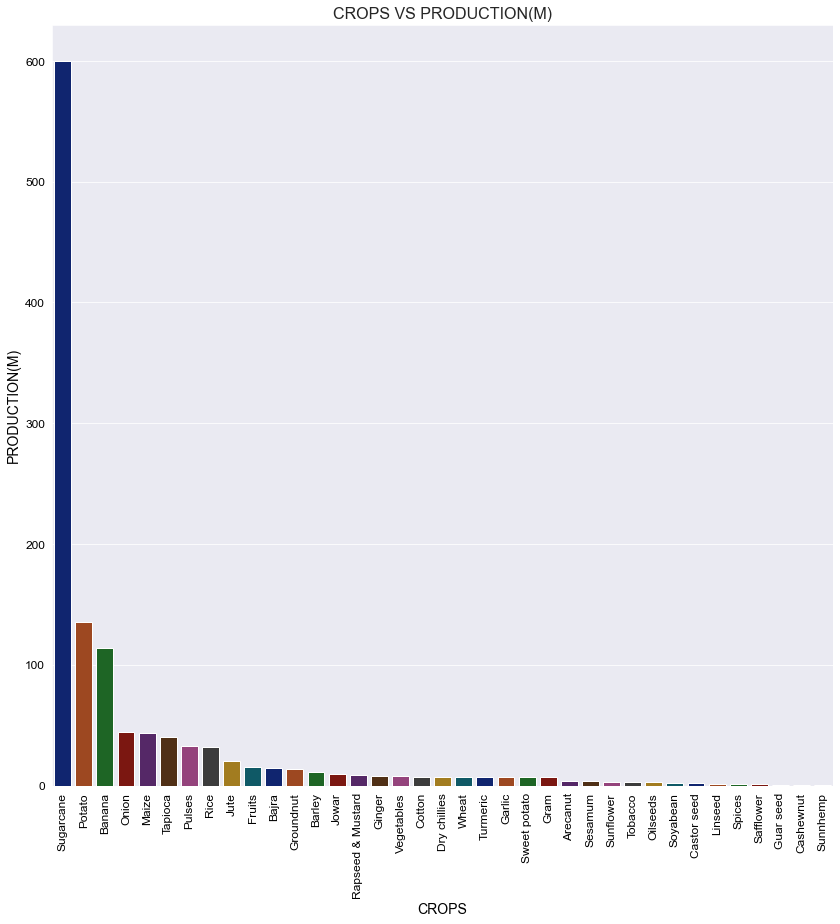

In [320]:
#visualising total production for each crops using barplot
plt.figure(figsize=(14,14))
sns.barplot(x='Crop',y='Production',data=prod_val,palette='dark')
plt.xticks(color='BLACK',fontsize=12,rotation=90)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('PRODUCTION(M)',color='BLACK',fontsize=14)
plt.xlabel('CROPS',color='BLACK',fontsize=14)
plt.title('CROPS VS PRODUCTION(M)',fontsize=16)
plt.show()

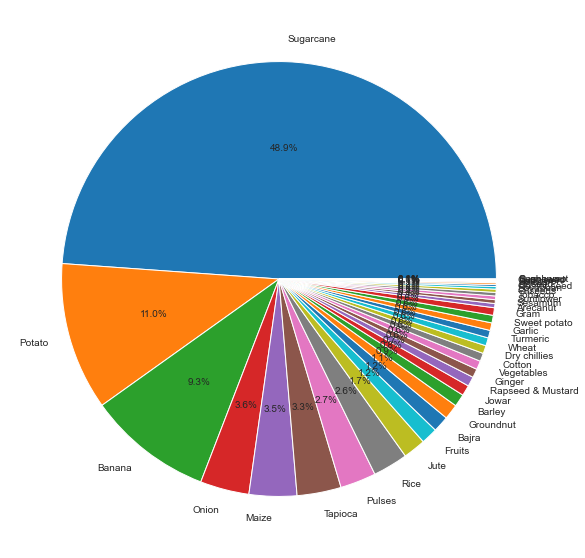

In [321]:
#visualising total production per crop using pie chart
plt.figure(figsize=(10,10))
plt.pie(x=prod_val['Production'],labels=prod_val['Crop'],autopct='%0.1f%%',data=prod_val)
plt.show()

In [322]:
#filtering out data for coconut only
new_df=data[data['Crop']=='Coconut ']

In [323]:
#printing data of coconut
new_df

,State,District,Year,Season,Crop,Area,Production,Prod_Per_Area,Zone
84,Andaman and Nicobar Islands,North and middle andaman,2000,Whole Year,Coconut,6992.0,23900000.0,3418.192220,Union-Territory
94,Andaman and Nicobar Islands,North and middle andaman,2001,Whole Year,Coconut,7015.0,25250000.0,3599.429793,Union-Territory
103,Andaman and Nicobar Islands,North and middle andaman,2006,Whole Year,Coconut,3575.0,15400000.0,4307.692308,Union-Territory
127,Andaman and Nicobar Islands,North and middle andaman,2010,Whole Year,Coconut,3668.0,12700000.0,3462.377317,Union-Territory
134,Andaman and Nicobar Islands,South andamans,2002,Whole Year,Coconut,7060.0,26830000.0,3800.283286,Union-Territory
...,...,...,...,...,...,...,...,...,...
245719,West Bengal,Purulia,2004,Whole Year,Coconut,66.0,296.1,4.486364,Central-India
245756,West Bengal,Purulia,2005,Whole Year,Coconut,74.0,311.0,4.202703,Central-India
245792,West Bengal,Purulia,2006,Whole Year,Coconut,73.0,365000.0,5000.000000,Central-India
245837,West Bengal,Purulia,2007,Whole Year,Coconut,58.0,898000.0,15482.758621,Central-India


In [324]:
#calculating total production of coconut for different states
prod_coco_state=data.groupby('State',as_index=False)['Production'].sum().sort_values('Production',ascending=False).reset_index(drop=True)
prod_coco_state['Production']=np.round(prod_coco_state['Production']/1000000,2)
prod_coco_state

,State,Production
0,Andhra Pradesh,2340.78
1,Tamil Nadu,2152.96
2,Assam,1711.55
3,West Bengal,774.90
4,Kerala,467.45
5,Puducherry,356.04
6,Andaman and Nicobar Islands,217.54
7,Uttar Pradesh,209.11
8,Goa,166.83
9,Telangana,133.61


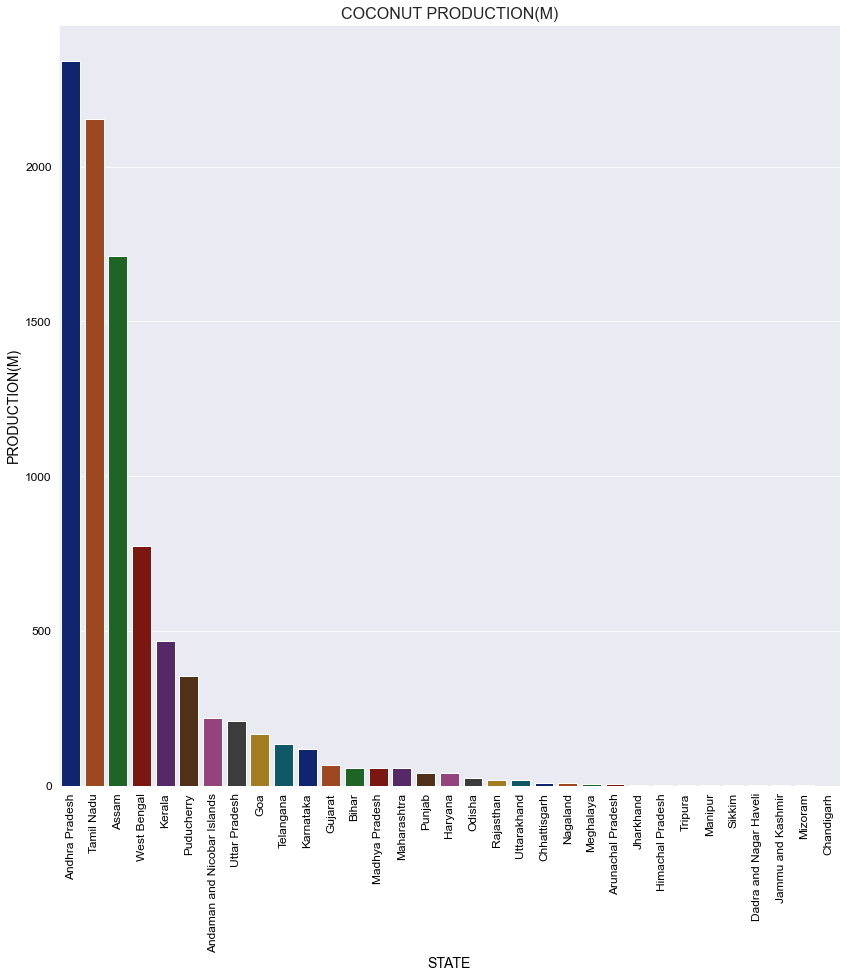

In [325]:
#visualising total production for each state using barplot for coconut
plt.figure(figsize=(14,14))
sns.barplot(x='State',y='Production',data=prod_coco_state,palette='dark')
plt.xticks(color='BLACK',fontsize=12,rotation=90)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('PRODUCTION(M)',color='BLACK',fontsize=14)
plt.xlabel('STATE',color='BLACK',fontsize=14)
plt.title('COCONUT PRODUCTION(M)',fontsize=16)
plt.show()

In [326]:
#calculating production for different year of coconut
prod_coco_year=data.groupby('Year',as_index=False)['Production'].sum().sort_values('Production',ascending=False).reset_index(drop=True)
prod_coco_year['Production']=np.round(prod_coco_year['Production']/1000000,2)
prod_coco_year

,Year,Production
0,2011,1450.64
1,2013,1110.78
2,2006,865.91
3,2007,610.75
4,2004,577.81
5,2009,538.77
6,2008,537.21
7,2003,499.88
8,2002,482.59
9,2000,463.58


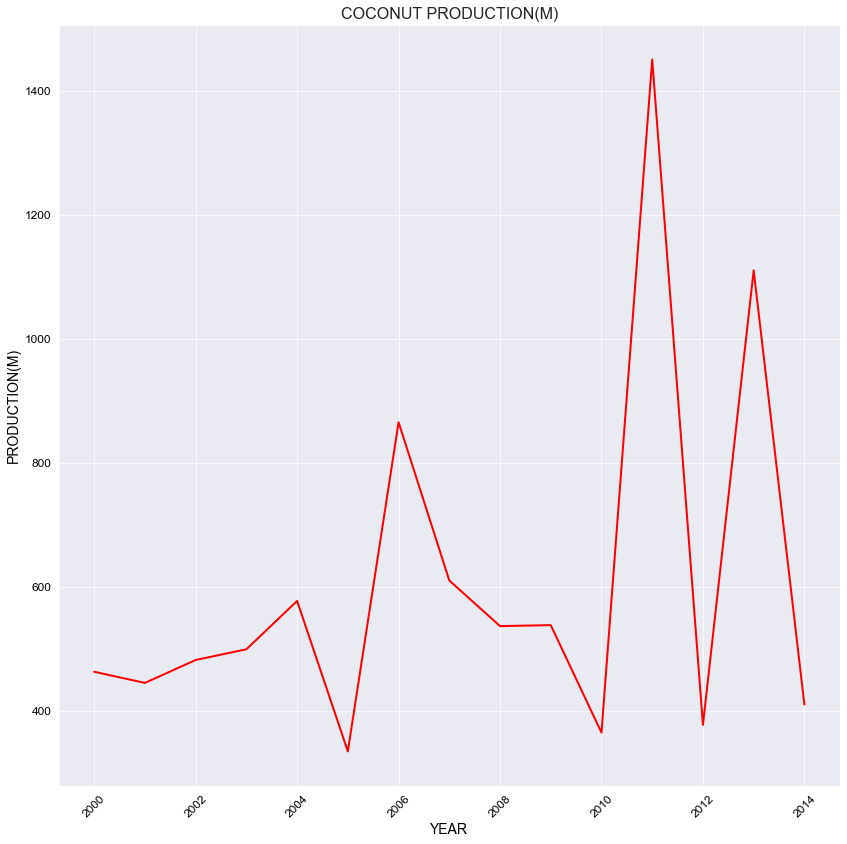

In [327]:
#visualising total production for each year using barplot of coconut
plt.figure(figsize=(14,14))
sns.lineplot(x='Year',y='Production',data=prod_coco_year,color='Red',linewidth=2)
plt.xticks(color='BLACK',fontsize=12,rotation=45)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('PRODUCTION(M)',color='BLACK',fontsize=14)
plt.xlabel('YEAR',color='BLACK',fontsize=14)
plt.title('COCONUT PRODUCTION(M)',fontsize=16)
plt.show()

In [328]:
#calculating total production for different season for coconut
prod_coco_season=data.groupby('Season',as_index=False)['Production'].sum().sort_values('Production',ascending=False).reset_index(drop=True)
prod_coco_season['Production']=np.round(prod_coco_season['Production']/1000000,2)
prod_coco_season

,Season,Production
0,Whole Year,8628.84
1,Kharif,275.57
2,Rabi,168.55


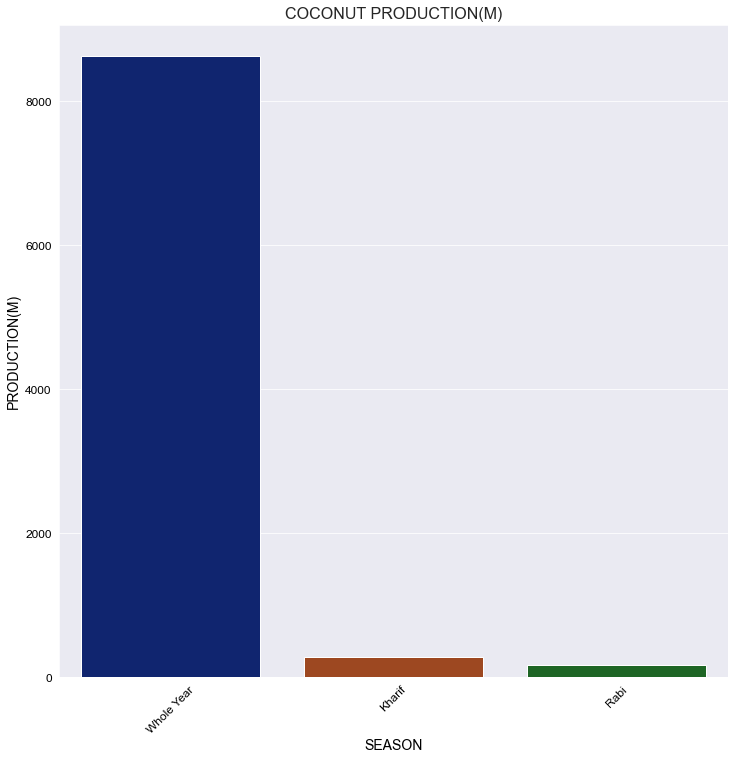

In [329]:
#visualising total production for each season using barplot of coconut
plt.figure(figsize=(12,12))
sns.barplot(x='Season',y='Production',data=prod_coco_season,palette='dark')
plt.xticks(color='BLACK',fontsize=12,rotation=45)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('PRODUCTION(M)',color='BLACK',fontsize=14)
plt.xlabel('SEASON',color='BLACK',fontsize=14)
plt.title('COCONUT PRODUCTION(M)',fontsize=16)
plt.show()

In [330]:
#calculating total production of coconut for different zones 
prod_coco_zone=data.groupby('Zone',as_index=False)['Production'].sum().sort_values('Production',ascending=False).reset_index(drop=True)
prod_coco_zone['Production']=np.round(prod_coco_zone['Production']/1000000,2)
prod_coco_zone

,Zone,Production
0,South-India,5213.81
1,East-India,1736.06
2,Central-India,918.49
3,Union-Territory,640.30
4,North-India,313.11
5,West-India,251.19


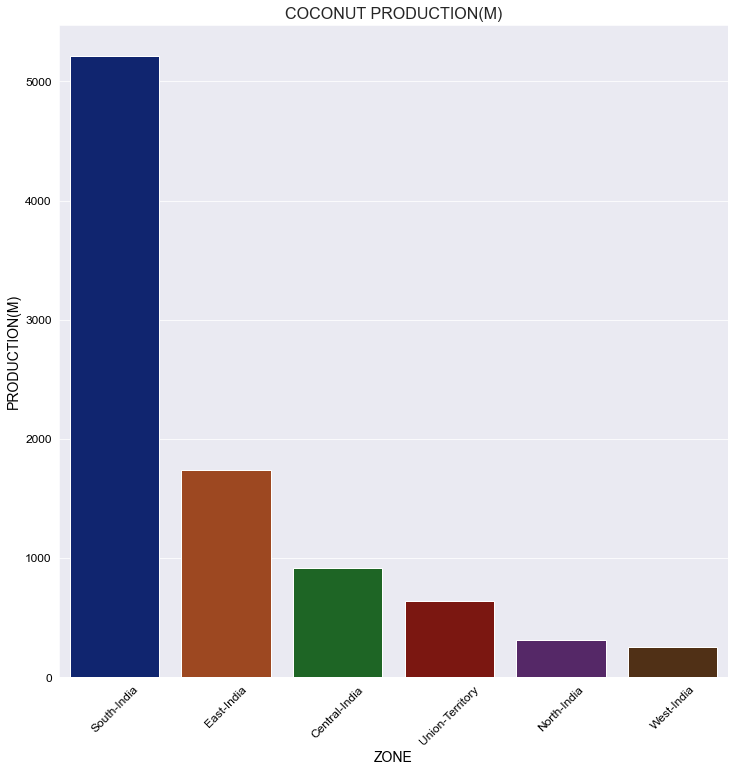

In [331]:
#visualising total production for each zone using barplot for coconut
plt.figure(figsize=(12,12))
sns.barplot(x='Zone',y='Production',data=prod_coco_zone,palette='dark')
plt.xticks(color='BLACK',fontsize=12,rotation=45)
plt.yticks(color='BLACK',fontsize=12)
plt.ylabel('PRODUCTION(M)',color='BLACK',fontsize=14)
plt.xlabel('ZONE',color='BLACK',fontsize=14)
plt.title('COCONUT PRODUCTION(M)',fontsize=16)
plt.show()

In [332]:
#calculating total area for cultivation of different crops in hectares
area_val=data.groupby('Crop')['Area'].sum().sort_values(ascending=False).to_dict()
for keys,value in area_val.items():
    area_val[keys]=np.round(value/1000000.0,2)
area_val

{'Pulses': 54.71,
 'Maize': 18.82,
 'Rice': 17.47,
 'Bajra': 14.4,
 'Rapseed & Mustard': 10.7,
 'Groundnut': 10.36,
 'Sesamum': 9.12,
 'Sugarcane': 9.07,
 'Jowar': 9.0,
 'Potato': 8.89,
 'Gram': 8.02,
 'Barley': 5.65,
 'Wheat': 4.77,
 'Dry chillies': 4.59,
 'Sunflower': 4.23,
 'Banana': 4.1,
 'Cotton': 4.08,
 'Linseed': 3.66,
 'Onion': 3.62,
 'Oilseeds': 3.14,
 'Coconut ': 2.34,
 'Vegetables': 2.32,
 'Arecanut': 2.24,
 'Soyabean': 2.15,
 'Jute': 2.11,
 'Castor seed': 1.8,
 'Fruits': 1.8,
 'Spices': 1.64,
 'Turmeric': 1.63,
 'Garlic': 1.52,
 'Safflower': 1.46,
 'Tobacco': 1.36,
 'Tapioca': 1.28,
 'Cashewnut': 1.27,
 'Ginger': 1.07,
 'Guar seed': 1.05,
 'Sweet potato': 0.82,
 'Sunnhemp': 0.21}

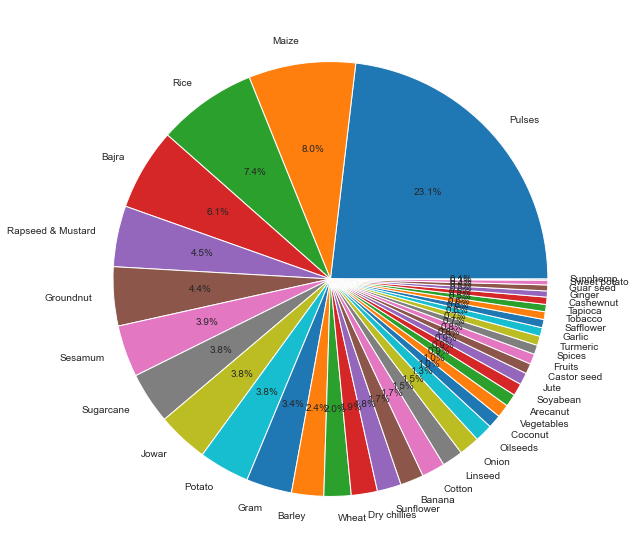

In [333]:
#visualising total area per crop for cultivation using pie chart
plt.figure(figsize=(10,10))
plt.pie(x=area_val.values(),labels=area_val.keys(),autopct='%0.1f%%')
plt.show()

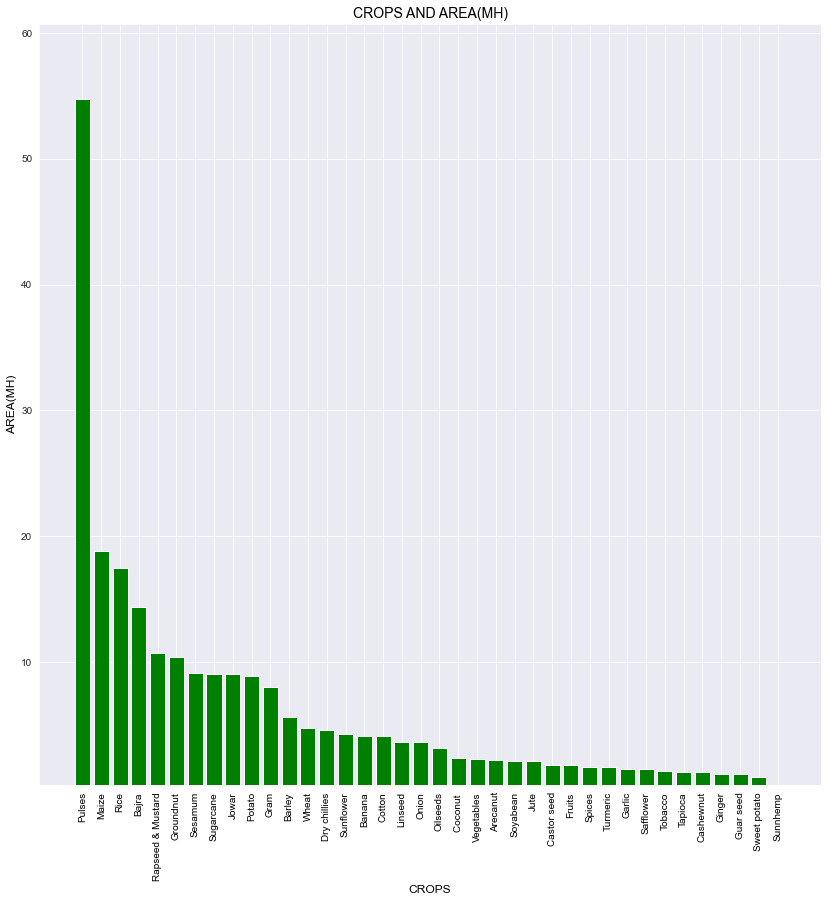

In [334]:
#visualising total area per crops using barplot
sns.set_style('darkgrid')
plt.figure(figsize=(14,14))
plt.bar(x=area_val.keys(),height=area_val.values(),data=area_val,color='Green')
plt.ylim(0.21,54.71+6)
plt.xticks(rotation=90,color='Black',fontsize=10)
plt.xlabel('CROPS',color='Black',fontsize=12)
plt.ylabel('AREA(MH)',color='Black',fontsize=12)
plt.title('CROPS AND AREA(MH)',color='Black',fontsize=14)
plt.show()

In [335]:
#calcualting correlation values between quantitative variables
cor=data.iloc[:,[2,5,6]].corr()

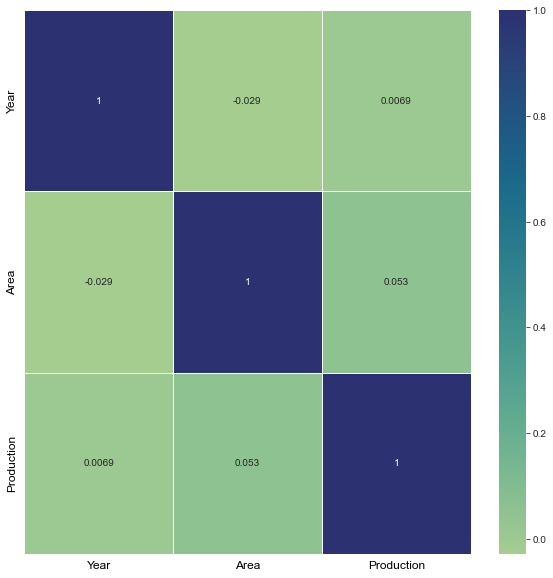

In [336]:
#visualising correlation values using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True,linewidth=0.5,cmap='crest')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

In [337]:
#saving the dataset to csv file
data.to_csv('crop_final.csv')